In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Preprocessing

In [3]:
data = pd.read_csv('Traindata.csv')  

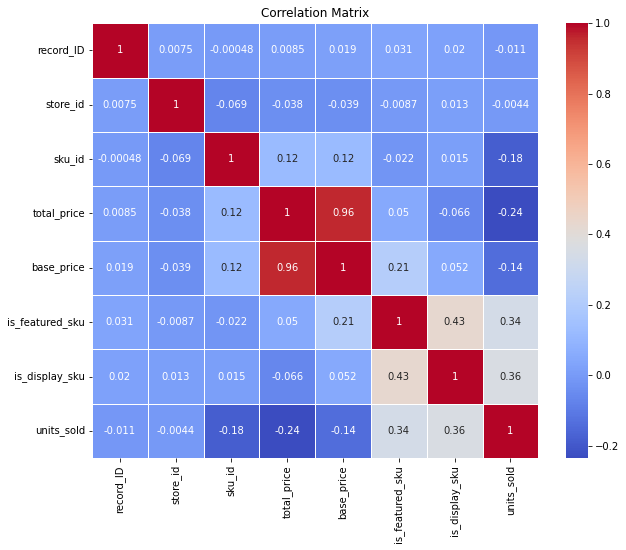

In [4]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Visualization

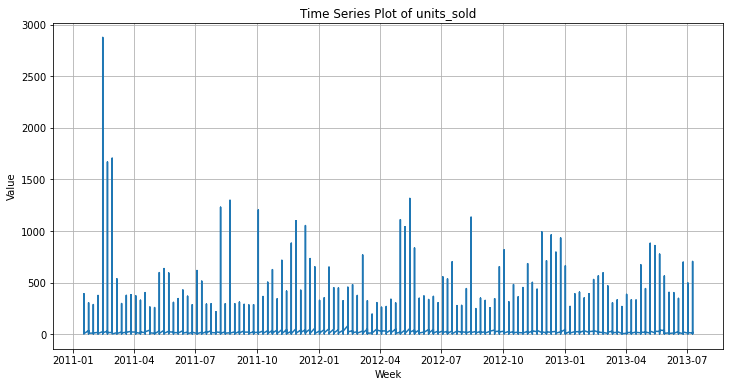

In [5]:
data_v1 = pd.read_csv('Traindata.csv')

data_v1['week'] = pd.to_datetime(data_v1['week'], format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
plt.plot(data_v1['week'], data_v1['units_sold'])
plt.title(f'Time Series Plot of units_sold')
plt.xlabel('Week')
plt.ylabel('Value')
plt.grid(True)
plt.show()

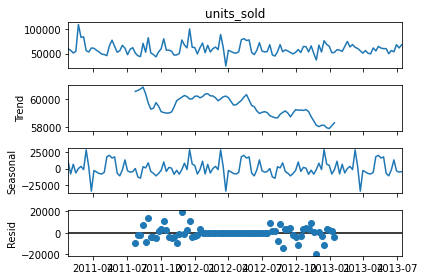

In [6]:
data_v2 = pd.read_csv('Traindata.csv')

data_v2['week'] = pd.to_datetime(data_v2['week'], format='%d-%m-%Y')

# Assuming 'data' is your DataFrame and 'week' is your datetime column
data_v2['week'] = pd.to_datetime(data_v2['week'])
data_v2.set_index('week', inplace=True)

# Resample the data to have a weekly frequency
data_v2 = data_v2.resample('W').sum()  # You can change 'sum' to another aggregation method if needed

# Perform seasonal decomposition
result = seasonal_decompose(data_v2['units_sold'], model='additive')

# Plot the components (trend, seasonal, and residual)
result.plot()
plt.show()

## Dealing with Missing values using EWMA

In [7]:
data = pd.read_csv('Traindata.csv')

missing_values = data.isnull().sum()
print(missing_values)

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [8]:
data['total_price'] = data['total_price'].ewm(alpha=0.2).mean()

## Oultiers Removal

In [9]:
# Calculate the IQR for the 'units_sold' column
Q1 = data['units_sold'].quantile(0.25)
Q3 = data['units_sold'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and remove outliers
data_no_outliers = data[(data['units_sold'] >= lower_bound) & (data['units_sold'] <= upper_bound)]

## General Stats from the cleaned Data

In [10]:
stats = data.describe()
print(stats)

           record_ID       store_id         sku_id    total_price  \
count  150150.000000  150150.000000  150150.000000  150150.000000   
mean   106271.555504    9199.422511  254761.132468     206.624069   
std     61386.037861     615.591445   85547.306447      39.441086   
min         1.000000    8023.000000  216233.000000      99.037500   
25%     53111.250000    8562.000000  217217.000000     180.535603   
50%    106226.500000    9371.000000  222087.000000     202.384886   
75%    159452.750000    9731.000000  245338.000000     220.802654   
max    212644.000000    9984.000000  679023.000000     392.773498   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150150.000000    150150.000000   150150.000000  150150.000000  
mean      219.425927         0.095611        0.133200      51.674206  
std       110.961712         0.294058        0.339792      60.207904  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500   

In [11]:
data.to_csv('final_data.csv', index=False)

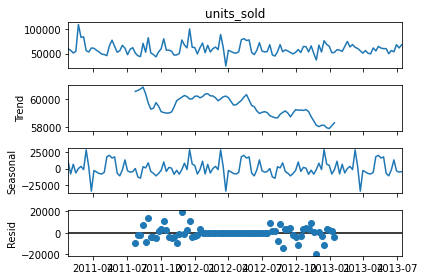

In [12]:
data['week'] = pd.to_datetime(data['week'], format='%d-%m-%Y')
# Assuming 'data' is your DataFrame and 'week' is your datetime column
data['week'] = pd.to_datetime(data['week'])
data.set_index('week', inplace=True)

# Resample the data to have a weekly frequency
data = data.resample('W').sum()  # You can change 'sum' to another aggregation method if needed

# Perform seasonal decomposition
result = seasonal_decompose(data['units_sold'], model='additive')

# Plot the components (trend, seasonal, and residual)
result.plot()
plt.show()

We can see that this data has decreasing Trend and this data also has Seasonality.
So we can apply 
- _Holt-Winters Exponential Smoothing:_ The Holt-Winters method is suitable for data with trend and seasonality. It has additive and multiplicative variations to handle both types of seasonality. This method is capable of capturing the decreasing trend while modeling seasonality.

## Data Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('final_data.csv')
# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns you want to normalize
columns_to_normalize = ['total_price', 'base_price']  # Replace with your column names

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.to_csv('normalized_data.csv', index=False)

In [14]:
data.head(100)

record_ID        week  store_id  sku_id  total_price  base_price  \
0           1  17-01-2011      8091  216418    -2.727788   -0.969377   
1           2  17-01-2011      8091  216419    -2.727788   -1.084958   
2           3  17-01-2011      8091  216425    -2.365008   -0.770322   
3           4  17-01-2011      8091  216233    -2.188042   -0.770322   
4           5  17-01-2011      8091  217390    -2.031543   -0.706110   
..        ...         ...       ...     ...          ...         ...   
95        125  17-01-2011      8058  217390    -0.454898   -0.930851   
96        128  17-01-2011      8058  219844    -0.212168    0.546015   
97        129  17-01-2011      8058  219009    -0.162503   -0.102522   
98        130  17-01-2011      8058  219029     0.285497    0.623069   
99        131  17-01-2011      8058  222087     0.044139   -0.076837   

    is_featured_sku  is_display_sku  units_sold  
0                 0               0          20  
1                 0               0          28  
2                 0               0          19  
3                 0               0          44  
4                 0               0          52  
..              ...             ...         ...  
95                0               1          82  
96                0               1          84  
97                0               0          51  
98                0               0          24  
99                1               0         173  

[100 rows x 9 columns]

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('normalized_data.csv')

# Group data by 'store_id' and 'week'
grouped = data.groupby(['store_id', 'week'])

# Initialize an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=['predicted_units_sold'])

# Define HWES hyperparameters (you may need to adjust these)
trend_type = 'add'  # or 'additive', depending on your data
seasonal_type = 'mul'  # or 'additive', depending on your data
seasonal_periods = 52  # assuming weekly data with yearly seasonality

# Iterate through each store and perform HWES forecasting
for (store_id, week), group in grouped:

    # Use "estimated" initialization method
    model = ExponentialSmoothing(group['units_sold'], trend=trend_type, seasonal=seasonal_type, seasonal_periods=seasonal_periods, initialization_method='estimated')
    result = model.fit()

    # Forecast the next 12 weeks
    forecast = result.forecast(steps=12)
    
    # Ensure non-negative predictions
    forecast = forecast.apply(lambda x: max(0, x))
    
    # Create a DataFrame for the predictions and append to the 'predictions' DataFrame
    pred_df = pd.DataFrame({'predicted_units_sold': forecast})
    predictions = pd.concat([predictions, pred_df])

# Save the final predictions to a CSV file
predictions.to_csv('hwes_predictions.csv', index=False)


c:\Users\91900\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

Above we can see that since our data has less than two full seasonal cycles, we can apply holt winters with seanality component

Lets try without that seasonality component.

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('normalized_data.csv')

# Group data by 'store_id' and 'week'
grouped = data.groupby(['store_id', 'week'])

# Initialize an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=['predicted_units_sold'])

# Define HWES hyperparameters (you may need to adjust these)
trend_type = 'add'  # or 'additive', depending on your data
seasonal_type = 'mul'  # or 'additive', depending on your data
seasonal_periods = 52  # assuming weekly data with yearly seasonality

# Iterate through each store and perform HWES forecasting
for (store_id, week), group in grouped:

    # Use "estimated" initialization method
    model = ExponentialSmoothing(group['units_sold'], trend=trend_type, initialization_method='estimated')
    result = model.fit()

    # Forecast the next 12 weeks
    forecast = result.forecast(steps=12)
    
    # Ensure non-negative predictions
    forecast = forecast.apply(lambda x: max(0, x))
    
    # Create a DataFrame for the predictions and append to the 'predictions' DataFrame
    pred_df = pd.DataFrame({'predicted_units_sold': forecast})
    predictions = pd.concat([predictions, pred_df])

# Save the final predictions to a CSV file
predictions.to_csv('hwes_predictions.csv', index=False)


c:\Users\91900\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91900\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91900\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\91900\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
 

The HWES is predicting some negative values since we ignored seasonality component. So some alternative approaches we can consider for forecasting when dealing with data that has a decreasing trend and no strong seasonality:
- Linear Regression
- Random Forest
- Gradient Boost
- LSTM

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your data (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('normalized_data.csv')

# Group data by 'store_id' and 'week'
grouped = data.groupby(['store_id', 'week'])

# Initialize an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=['store_id', 'week', 'predicted_units_sold'])

# Iterate through each store and perform linear regression forecasting
for (store_id, week), group in grouped:

    # Fit a linear regression model
    X = group.index.values.reshape(-1, 1)  # Assuming 'week' is your time variable
    y = group['units_sold']
    model = LinearRegression().fit(X, y)

    # Forecast the next 12 weeks
    future_weeks = [group.index[-1] + i + 1 for i in range(12)]
    forecast = model.predict(np.array(future_weeks).reshape(-1, 1))

    # Create a DataFrame for the predictions and append to the 'predictions' DataFrame
    pred_df = pd.DataFrame({'store_id': store_id, 'week': future_weeks, 'predicted_units_sold': forecast})
    predictions = pd.concat([predictions, pred_df])

# Save the final predictions to a CSV file
predictions.to_csv('linear_regression_predictions.csv', index=False)


In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load your data (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('normalized_data.csv')

# Group data by 'store_id' and 'week'
grouped = data.groupby(['store_id', 'week'])

# Initialize an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=['store_id', 'week', 'predicted_units_sold'])

# Iterate through each store and perform Random Forest regression forecasting
for (store_id, week), group in grouped:

    # Prepare the data for Random Forest
    X = group.index.values.reshape(-1, 1)  # Assuming 'week' is your time variable
    y = group['units_sold']

    # Create a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the hyperparameters

    # Fit the model
    model.fit(X, y)

    # Forecast the next 12 weeks
    future_weeks = [group.index[-1] + i + 1 for i in range(12)]
    forecast = model.predict(np.array(future_weeks).reshape(-1, 1))

    # Create a DataFrame for the predictions and append to the 'predictions' DataFrame
    pred_df = pd.DataFrame({'store_id': store_id, 'week': future_weeks, 'predicted_units_sold': forecast})
    predictions = pd.concat([predictions, pred_df])

# Save the final predictions to a CSV file
predictions.to_csv('random_forest_predictions.csv', index=False)


In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor

# Load your data (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('normalized_data.csv')

# Group data by 'store_id' and 'week'
grouped = data.groupby(['store_id', 'week'])

# Initialize an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=['store_id', 'week', 'predicted_units_sold'])

# Iterate through each store and perform Gradient Boosting (XGBoost) regression forecasting
for (store_id, week), group in grouped:

    # Prepare the data for XGBoost
    X = group.index.values.reshape(-1, 1)  # Assuming 'week' is your time variable
    y = group['units_sold']

    # Create an XGBoost model
    model = XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42)  # You can adjust the hyperparameters

    # Fit the model
    model.fit(X, y)

    # Forecast the next 12 weeks
    future_weeks = [group.index[-1] + i + 1 for i in range(12)]
    forecast = model.predict(np.array(future_weeks).reshape(-1, 1))

    # Create a DataFrame for the predictions and append to the 'predictions' DataFrame
    pred_df = pd.DataFrame({'store_id': store_id, 'week': future_weeks, 'predicted_units_sold': forecast})
    predictions = pd.concat([predictions, pred_df])

# Save the final predictions to a CSV file
predictions.to_csv('xgboost_predictions.csv', index=False)

From tghe above models, XGBoost out puts are some what better, HWES and LInear Regression are producing negative outputs, while Random Forest is producing same value for All prodects for every week. XG boost's outputs are varying and better compared to all the other models

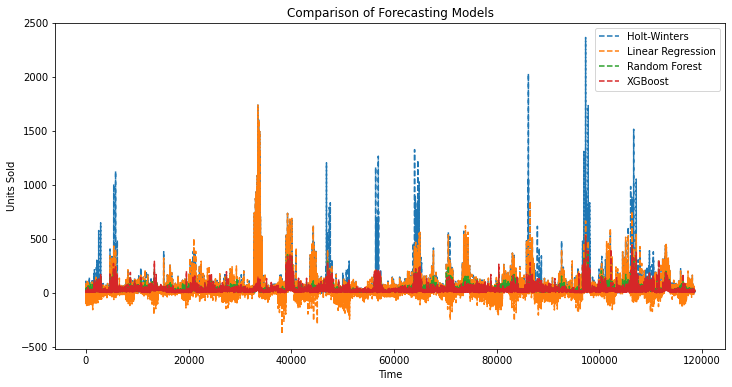

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your prediction files (replace 'hwes_predictions.csv', 'lstm_predictions.csv', etc. with the actual filenames)
hwes_predictions = pd.read_csv('hwes_predictions.csv')
lr_predictions = pd.read_csv('linear_regression_predictions.csv')
rf_predictions = pd.read_csv('random_forest_predictions.csv')
xgb_predictions = pd.read_csv('xgboost_predictions.csv')
# lstm_predictions = pd.read_csv('lstm_predictions.csv')
# prophet_predictions = pd.read_csv('prophet_predictions.csv')

# Assuming the structure of your DataFrames is like 'store_id', 'week', 'predicted_units_sold'
# You might need to adjust this based on the actual structure of your prediction DataFrames

plt.figure(figsize=(12, 6))
plt.plot(hwes_predictions['predicted_units_sold'], label='Holt-Winters', linestyle='dashed')
plt.plot(lr_predictions['predicted_units_sold'], label='Linear Regression', linestyle='dashed')
plt.plot(rf_predictions['predicted_units_sold'], label='Random Forest', linestyle='dashed')
plt.plot(xgb_predictions['predicted_units_sold'], label='XGBoost', linestyle='dashed')
# plt.plot(lstm_predictions['predicted_units_sold'], label='LSTM', linestyle='dashed')
# plt.plot(prophet_predictions['predicted_units_sold'], label='Prophet', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.legend()
plt.title('Comparison of Forecasting Models')
plt.show()